# TP Challenge

Replace your_name  by your name 

## Your task

Today you are a datascientist for a marketing saas company.
You have some data about your customer, a file with some features and the target **buy**.

The target variable is whether a customer will click 'Buy' on a website. Buy = 0 and Buy = 1 indicate 'no' and 'yes' respectively. Independent variables capture customer background and customer website navigation behavior information. First variable in the train.csv data file identifies each customer uniquely.

**The challenge is to correctly predict if a customer will click 'buy' on a website.**

In [1]:
# Installing dependencies
%pip install pandas
%pip install seaborn
%pip install imblearn
%pip install scikit-learn
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Importing Librairies

In [2]:
#Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import numpy as np

## Preprocessing

- Check if missing values

- Check if duplicates ( if yes delete duplicated rows)

In [3]:
# Loading the dataset
url = "./data/train.csv"
data = pd.read_csv(url)

# Selecting some columns of interest
data = data.drop('Id', axis=1)

# Showing duplicates
duplicate_count = len(data) - len(data.drop_duplicates()) # Original data length minus data length without duplicates
print(duplicate_count)

# Deleting duplicates
data.drop_duplicates(inplace=True) # Drop duplicates in place

# Showing data
data

304


,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V78,V79,V80,V81,V82,V83,V84,V85,V86,Buy
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,23,1,2,1,5,0,5,0,5,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4102,13,1,2,3,3,0,2,0,7,5,...,0,0,0,1,0,0,0,0,0,0
4103,36,1,1,2,8,0,6,1,2,1,...,0,0,0,1,0,0,0,0,0,0
4104,35,1,4,4,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
4105,33,1,3,4,8,0,6,0,3,5,...,0,0,0,1,0,0,0,0,0,1


## Visualization 

- Check if you have outliers in each features (columns) using seaborn or matplotlib
- Check the correlation between each columns ( seaborn can maybe help you.. )[https://seaborn.pydata.org/generated/seaborn.pairplot.html]

- Plot the distribution of the target


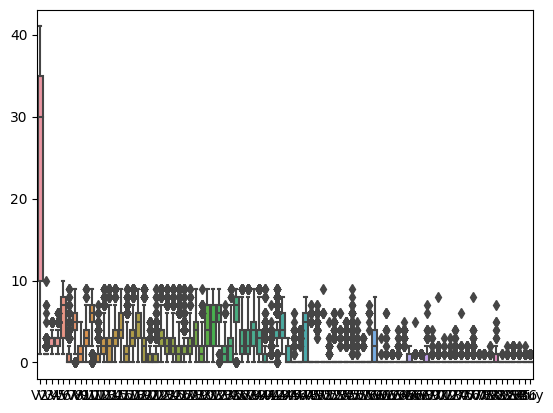

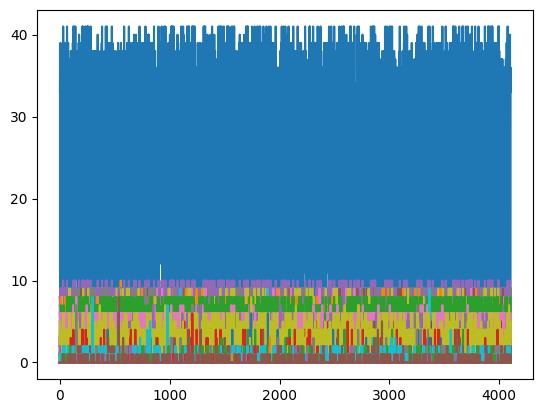

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V78,V79,V80,V81,V82,V83,V84,V85,V86,Buy
V2,1.000000,-0.044904,-0.046391,0.020545,0.992738,-0.190374,0.077089,-0.021870,-0.011534,-0.076074,...,0.022405,-0.010998,-0.001496,0.012676,0.010114,-0.011296,-0.024144,-0.020698,-0.045031,-0.079053
V3,-0.044904,1.000000,0.008348,0.033338,-0.051179,-0.005849,-0.038626,0.009312,0.035299,0.014049,...,0.016170,0.007004,-0.017467,0.002991,-0.007624,0.004768,-0.022316,0.024315,0.002076,-0.012765
V4,-0.046391,0.008348,1.000000,-0.330312,-0.008909,0.003128,0.052956,-0.096053,-0.013525,0.527530,...,-0.007337,0.015607,0.013362,-0.013091,0.011485,0.008701,0.032823,0.033449,0.027098,0.033190
V5,0.020545,0.033338,-0.330312,1.000000,0.015639,-0.039297,0.101487,0.034585,-0.115677,-0.038849,...,0.022587,0.015348,-0.004084,0.033887,0.000046,0.008323,0.019187,-0.018947,-0.015189,0.011037
V6,0.992738,-0.051179,-0.008909,0.015639,1.000000,-0.195681,0.088719,-0.031991,-0.016718,-0.037143,...,0.022340,-0.009890,-0.002019,0.012259,0.009288,-0.014933,-0.026713,-0.020185,-0.043739,-0.077290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V83,-0.011296,0.004768,0.008701,0.008323,-0.014933,-0.008126,0.012664,0.008856,-0.008523,-0.003028,...,0.040577,-0.006288,-0.004700,0.010994,0.116160,1.000000,-0.011094,0.057883,0.043295,0.156957
V84,-0.024144,-0.022316,0.032823,0.019187,-0.026713,-0.002187,-0.002360,0.027669,-0.002515,0.023138,...,-0.011048,0.016786,-0.009782,-0.040624,-0.004269,-0.011094,1.000000,0.010145,0.011313,0.027957
V85,-0.020698,0.024315,0.033449,-0.018947,-0.020185,-0.024766,0.016173,-0.015740,0.000654,-0.005663,...,-0.007118,0.021704,-0.006302,0.019707,0.089009,0.057883,0.010145,1.000000,0.008143,0.026935
V86,-0.045031,0.002076,0.027098,-0.015189,-0.043739,-0.008643,0.024520,0.011210,-0.033180,0.031803,...,-0.009054,0.110654,-0.008016,0.033755,-0.003499,0.043295,0.011313,0.008143,1.000000,0.077498


In [4]:
# Check outliers
sns.boxplot(data)
plt.show()
plt.plot(data)
plt.show()

# Check correlation
corr_matrix = data.corr()
corr_matrix

## Undersample your data

- Undersample the target with ( you may have to pip install -U imbalanced-learn)

from imblearn.over_sampling import RandomOverSampler, SMOTE

Ou 

from imblearn.under_sampling import RandomUnderSampler

In [5]:
# Define feature and target
x = data.drop('Buy', axis=1)
y = data['Buy']

# Undersampling
random_undersampler = RandomUnderSampler(random_state=0)
x_resampled, y_resampled = random_undersampler.fit_resample(x, y)

## Building models 

- Build a dummy model to have a baseline score

- Build a better model to classify your data and beat your baseline model

- Check the :
    - accuracy,
    - Recall,
    - Precision,
    - f1 score

- Plot your learning curve
--------------------------------









**⚠️(OPTIONAL)⚠️**
- Try to improve your first model by using a robust scaler or StandardScaler

- Try to use another  classifier model to improve your model performance

- Check the :
    - accuracy,
    - Recall,
    - Precision,
    - f1 score

- Plot your learning curve


0.5408163265306123
0.20408163265306123
0.625
0.3076923076923077


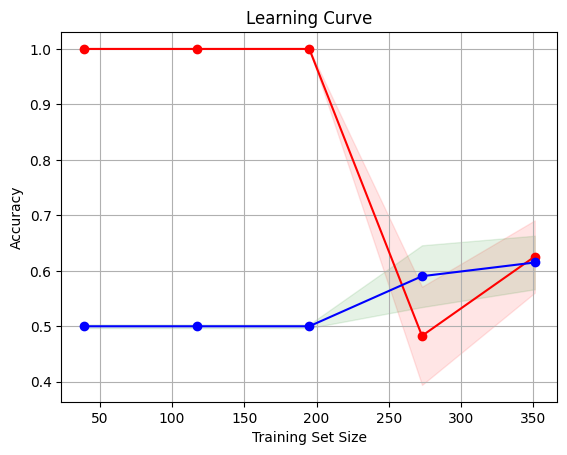

In [6]:
# Building dummy model
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=0)
dummy_model = GaussianNB()
dummy_model.fit(x_train, y_train)

# Checking scores
prediction = dummy_model.predict(x_test)
    # Accuracy
accuracy = accuracy_score(y_test, prediction)
print(accuracy)
    # Recall
recall = recall_score(y_test, prediction)
print(recall)
    # Precision
precision = precision_score(y_test, prediction)
print(precision)
    # F1 score
f1_score = f1_score(y_test, prediction)
print(f1_score)

# Defining learning curve
train_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]
train_sizes, train_scores, test_scores = learning_curve(dummy_model, x_resampled, y_resampled, cv=5, train_sizes=train_sizes, scoring='accuracy')

# Calculating scores and deviation
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Drawing learning curve
plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training accuracy')
plt.plot(train_sizes, test_scores_mean, 'o-', color='b', label='Validation accuracy')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='b')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.grid(True)
plt.show()

# Finish ?

add your code to a repos and send me the link by mail in the format :

the subject of the email will be **YOUR NAME | ML-IIM-challenge**

Send it to magloire.ndabagera@gmail.com at 5pm max.